In [1]:
#read the dataset
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [2]:
df["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [3]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [4]:
df.shape

(8523, 12)

In [5]:
#missing values in Item_weight and Outlet_size needs to be imputed
mean = df['Item_Weight'].mean() #imputing item_weight with mean
print("Item_Weight Mean",mean)
df['Item_Weight'].fillna(mean, inplace =True)

mode = df['Outlet_Size'].mode() #imputing outlet size with mode
print("Outlet_Size Mode", mode)
df['Outlet_Size'].fillna(mode[0], inplace =True)

Item_Weight Mean 12.857645184136183
Outlet_Size Mode 0    Medium
dtype: object


In [6]:
#removing unnecessary columns
df.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)

In [7]:
df.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(5)
memory usage: 665.9+ KB


In [9]:
df = pd.get_dummies(df)

In [8]:
df.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Fat_Content_LF',
       'Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Fat_Content_low fat', 'Item_Fat_Content_reg',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Size_High',
       'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [10]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

#### Regression Metrics

##### Mean Squared Error
​
Mean squared error calculates the average of the squares of the errors or deviation between the actual
value and the predicted values, as predicted by a regression model. The mean squared error or MSE can be
used to evaluate a regression model, with lower values meaning a better regression models with less errors.
Taking the square root of the MSE yields the root-mean-square-error or RMSE, which can also be used as an
evaluation metric for regression models.In the scikit-learn package the MSE can be calculated by invoking the mean_squared_error function
from the metrics module.

In [11]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    y_pred=model.predict(x_test) #make prediction on test set
#     print(y_pred)
    error = sqrt(mean_squared_error(y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 1547.2243862163753
RMSE value for k=  2 is: 1343.566412547753
RMSE value for k=  3 is: 1272.979943827438
RMSE value for k=  4 is: 1266.3852964458788
RMSE value for k=  5 is: 1249.7367198904587
RMSE value for k=  6 is: 1238.5630400998039
RMSE value for k=  7 is: 1235.946402766016
RMSE value for k=  8 is: 1234.6851831763656
RMSE value for k=  9 is: 1233.3611689605423
RMSE value for k=  10 is: 1237.5042971367816
RMSE value for k=  11 is: 1245.8148829537433
RMSE value for k=  12 is: 1253.56342186639
RMSE value for k=  13 is: 1259.7900421398833
RMSE value for k=  14 is: 1262.7855471644093
RMSE value for k=  15 is: 1267.7902207407126
RMSE value for k=  16 is: 1274.0131580628336
RMSE value for k=  17 is: 1281.8927275366996
RMSE value for k=  18 is: 1286.1801295110113
RMSE value for k=  19 is: 1287.7323552996736
RMSE value for k=  20 is: 1292.0109895607306


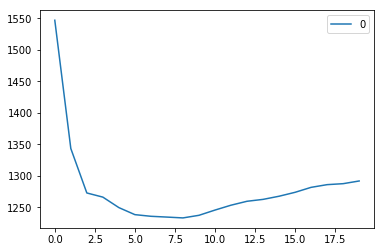

In [16]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [22]:
model_deploy = neighbors.KNeighborsRegressor(n_neighbors = 9)
model_deploy.fit(x_train, y_train)  #fit the model
# y_pred=model.predict(x_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                    weights='uniform')

In [23]:
#reading test and submission files
test = pd.read_csv('test.csv')
#preprocessing test dataset
test.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)
test['Item_Weight'].fillna(mean, inplace =True)
test = pd.get_dummies(test)
scaler = MinMaxScaler(feature_range=(0, 1))
test_scaled = scaler.fit_transform(test)
test = pd.DataFrame(test_scaled)

#predicting on the test set and creating submission file
predict = model_deploy.predict(test)

In [24]:
predict

array([2366.69706667, 1603.61628889,  391.26846667, ..., 1929.19248889,
       2688.13051111, 1820.14924444])